<a href="https://colab.research.google.com/github/dggasque/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df_dr = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
df_dr.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [3]:
# Perform K-Means Clustering on the Dataset

# See if data should be normalized

df_dr.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

There is a lot of variance in the scale of the data. We will need to normalize the data in order to better compare the features.

In [0]:
# Perform standardization on the data
df_std = (df_dr - df_dr.mean()) / (df_dr.std())

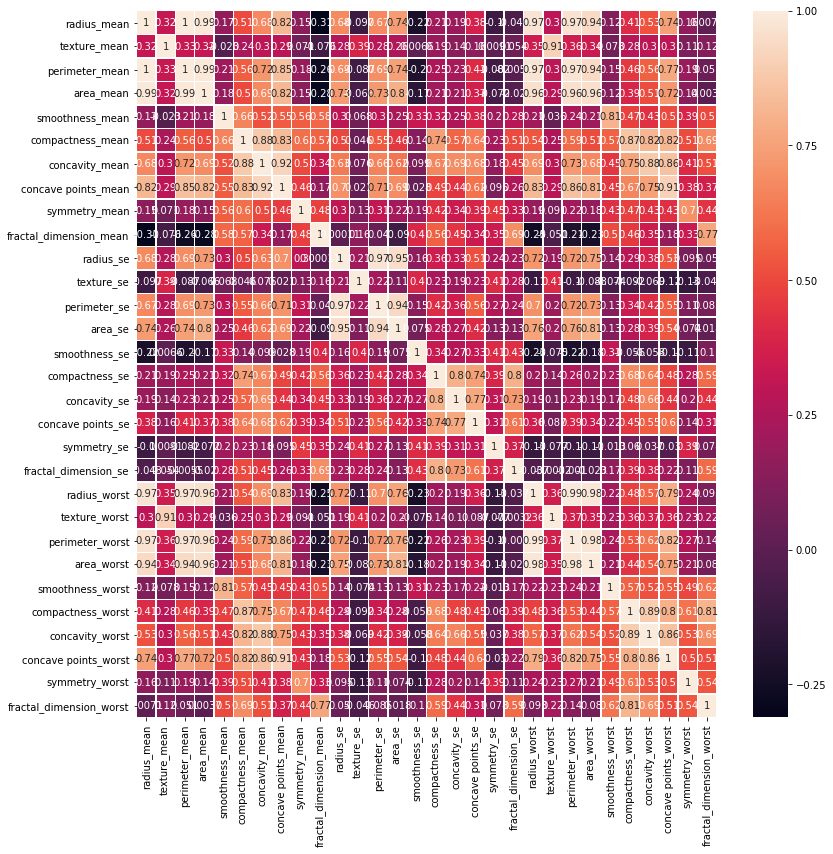

In [5]:
# Reduce features by looking for correlation > 0.8
import seaborn as sns

f,ax = plt.subplots(figsize=(13, 13))

sns.heatmap(df_std.corr(), annot = True, ax = ax,  linewidths=.5);

radius_mean has a high correlation with ['perimeter_mean', 'area_mean, 'radius_worst', 'perimeter_worst', 'area_worst']

texture_mean has a high correlation with ['texture_worst']

concavity_mean has a high correlation with ['concave points_mean']

radius_se : ['perimeter_se', 'area_se']

I am going to keep 'area_mean' and 'area_se'  as they capture parameter and radius measurments, 'texture_mean' as it is more inclusive, and 'concavity_mean'. 




In [6]:
drop_lst = ['perimeter_mean', 'radius_mean', 'radius_worst', 'perimeter_worst',
            'area_worst', 'texture_worst', 'perimeter_se', 'radius_se', 
            'concave points_mean', 'compactness_se', 'concavity_se']

df_reduced = df_std.drop(drop_lst, axis=1)

df_reduced.shape

(569, 19)

In [7]:
df_reduced.describe()

texture_mean     area_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02  5.690000e+02  ...    5.690000e+02             5.690000e+02
mean  -6.558316e-15 -8.339355e-16  ...   -2.481734e-15             2.424930e-15
std    1.000000e+00  1.000000e+00  ...    1.000000e+00             1.000000e+00
min   -2.227289e+00 -1.453164e+00  ...   -2.159060e+00            -1.600431e+00
25%   -7.253249e-01 -6.666089e-01  ...   -6.412994e-01            -6.913035e-01
50%   -1.045442e-01 -2.949274e-01  ...   -1.272975e-01            -2.162538e-01
75%    5.836621e-01  3.631877e-01  ...    4.497425e-01             4.503661e-01
max    4.647799e+00  5.245913e+00  ...    6.040726e+00             6.840837e+00

[8 rows x 19 columns]

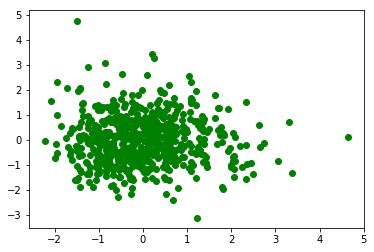

In [8]:
plt.scatter(df_reduced.iloc[:,0], df_reduced.iloc[:, 2], c = 'green');

In [0]:
df_use = df_reduced[['texture_mean', 'smoothness_mean']]

In [0]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_use)
    sum_of_squared_distances.append(km.inertia_)

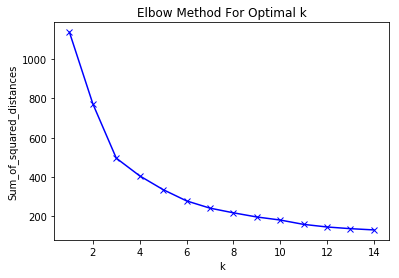

In [11]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
kmeans = KMeans(2)
kmeans.fit(df_use)
labels = kmeans.labels_

In [13]:
new_series = pd.Series(labels)
df_use['clusters'] = new_series.values

df_use.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


texture_mean  smoothness_mean  clusters
0     -2.071512         1.567087         0
1     -0.353322        -0.826235         0
2      0.455786         0.941382         1
3      0.253509         3.280667         1
4     -1.150804         0.280125         0

In [14]:
# Kmeans using all the features
sns.pairplot(df_reduced);

In [0]:
kmeans = KMeans(2)
kmeans.fit(df_reduced)
labels = kmeans.labels_

In [16]:
new_series = pd.Series(labels)
df_reduced['clusters'] = new_series.values

df_reduced.head()

texture_mean  area_mean  ...  fractal_dimension_worst  clusters
0     -2.071512   0.983510  ...                 1.935312         1
1     -0.353322   1.907030  ...                 0.280943         0
2      0.455786   1.557513  ...                 0.201214         1
3      0.253509  -0.763792  ...                 4.930672         1
4     -1.150804   1.824624  ...                -0.396751         1

[5 rows x 20 columns]

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [17]:
# Your Code Here
df_use['diagnosis'] = df['diagnosis']
df_use.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


texture_mean  smoothness_mean  clusters diagnosis
0     -2.071512         1.567087         0         M
1     -0.353322        -0.826235         0         M
2      0.455786         0.941382         1         M
3      0.253509         3.280667         1         M
4     -1.150804         0.280125         0         M

In [18]:
plt.scatter(df_use['texture_mean'], df_use['smoothness_mean'], c=df_use['clusters'])

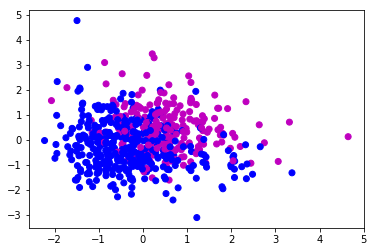

In [19]:
plt.scatter(df_use['texture_mean'], df_use['smoothness_mean'], c=df_use['diagnosis'])

In [20]:
df_use['diagnosis'] = df_use['diagnosis'].astype('category')
df_use['diagnosis'] = df_use['diagnosis'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df_use.shape

(569, 4)

In [22]:
count = 0
for i in range(569):
  if df_use['clusters'].iloc[i] == df_use['diagnosis'].iloc[i]:
    count += 1

print(count)

422


In [23]:
accuracy_score = count/df_use.shape[0]
accuracy_score

0.7416520210896309

In [24]:
#Calculate accuracy score for all features
df_reduced['diagnosis'] = df_use['diagnosis']
df_reduced.head()

texture_mean  area_mean  ...  clusters  diagnosis
0     -2.071512   0.983510  ...         1          1
1     -0.353322   1.907030  ...         0          1
2      0.455786   1.557513  ...         1          1
3      0.253509  -0.763792  ...         1          1
4     -1.150804   1.824624  ...         1          1

[5 rows x 21 columns]

In [25]:

count = 0
for i in range(569):
  if df_reduced['clusters'].iloc[i] == df_reduced['diagnosis'].iloc[i]:
    count += 1

print(count)

479


In [46]:
accuracy_score = count/df_use.shape[0]
accuracy_score

0.08787346221441125

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_dr)

In [28]:
# Apply PCA to the data
pca = PCA(2)
pca_features = pca.fit_transform(scaled_data)
pca_features

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [29]:
# Scatterplot of PC1 and PC2
plt.scatter(pca_features[:,0], pca_features[:,1])

In [0]:
kmeans = KMeans(2)
kmeans.fit(pca_features)
labels = kmeans.labels_

In [31]:
new_series = pd.Series(labels)
pca_df = pd.DataFrame(pca_features, columns= ['PC1', 'PC2'])
                     
pca_df['clusters'] = new_series.values

pca_df.head()

PC1        PC2  clusters
0  9.192837   1.948583         1
1  2.387802  -3.768172         1
2  5.733896  -1.075174         1
3  7.122953  10.275589         1
4  3.935302  -1.948072         1

In [32]:
pca_df['diagnosis'] = df_use['diagnosis']
pca_df.head()

PC1        PC2  clusters  diagnosis
0  9.192837   1.948583         1          1
1  2.387802  -3.768172         1          1
2  5.733896  -1.075174         1          1
3  7.122953  10.275589         1          1
4  3.935302  -1.948072         1          1

In [33]:
# Scatterplot of PC1 and PC2
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['clusters'])

In [34]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['diagnosis'])

In [35]:
# Apply PCA to the data
pca = PCA(16)
pca_features = pca.fit_transform(scaled_data)
pca_features

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -6.90804598e-01, -6.01797454e-01,  7.45121797e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
        -6.53475162e-01,  8.97628747e-03, -6.48810663e-01],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         1.66798227e-02,  4.83420297e-01,  3.25109757e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         2.85690854e-01,  9.09975898e-02, -2.32648213e-01],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         2.18697428e-01,  2.29588983e-01, -6.10439828e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -1.17072416e+00,  2.17347679e-01,  9.21281602e-01]])

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

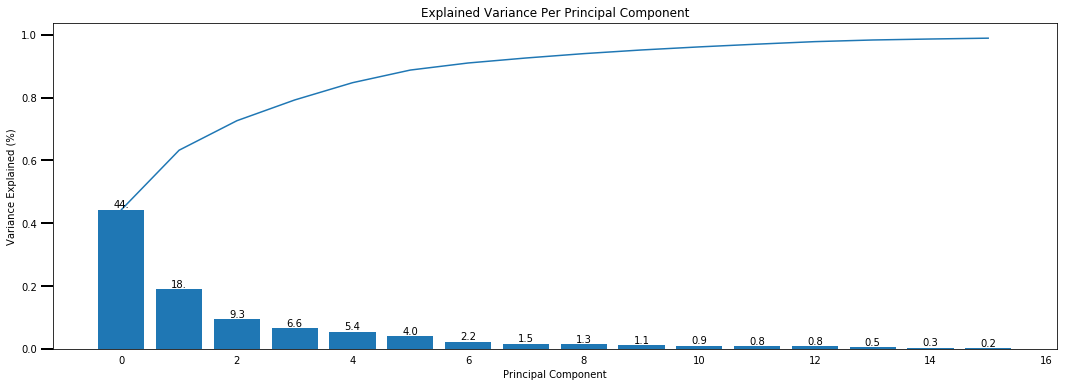

In [37]:
scree_plot(pca)

In [47]:
pca = PCA(7)
pca_features = pca.fit_transform(scaled_data)
pca_features

array([[ 9.19283683,  1.94858307, -1.1231662 , ..., -1.1951103 ,
         1.41142573,  2.15938473],
       [ 2.3878018 , -3.76817174, -0.5292927 , ...,  0.62177507,
         0.02865613,  0.01335663],
       [ 5.73389628, -1.07517379, -0.5517474 , ..., -0.17708531,
         0.54144699, -0.66823241],
       ...,
       [ 1.25617928, -1.90229671,  0.56273052, ...,  1.80999133,
        -0.53444719, -0.19275714],
       [10.37479406,  1.6720101 , -1.87702935, ..., -0.03374207,
         0.56793707,  0.2230909 ],
       [-5.4752433 , -0.67063679,  1.49044307, ..., -0.18470332,
         1.61783688,  1.69895163]])

In [0]:
kmeans = KMeans(2)
kmeans.fit(pca_features)
labels = kmeans.labels_

In [54]:
new_series = pd.Series(labels)
pca7_df = pd.DataFrame(pca_features, 
                      columns= ['PC1', 'PC2',
                                'PC3', 'PC4',
                                'PC5', 'PC6', 
                                'PC7'])
                     
pca7_df['clusters'] = new_series.values

pca7_df.head()

PC1        PC2       PC3  ...       PC6       PC7  clusters
0  9.192837   1.948583 -1.123166  ...  1.411426  2.159385         1
1  2.387802  -3.768172 -0.529293  ...  0.028656  0.013357         1
2  5.733896  -1.075174 -0.551747  ...  0.541447 -0.668232         1
3  7.122953  10.275589 -3.232789  ...  3.053413  1.429806         1
4  3.935302  -1.948072  1.389767  ... -1.226494 -0.936202         1

[5 rows x 8 columns]

In [55]:
pca7_df['diagnosis'] = df_use['diagnosis']
pca7_df.head()

PC1        PC2       PC3  ...       PC7  clusters  diagnosis
0  9.192837   1.948583 -1.123166  ...  2.159385         1          1
1  2.387802  -3.768172 -0.529293  ...  0.013357         1          1
2  5.733896  -1.075174 -0.551747  ... -0.668232         1          1
3  7.122953  10.275589 -3.232789  ...  1.429806         1          1
4  3.935302  -1.948072  1.389767  ... -0.936202         1          1

[5 rows x 9 columns]

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [42]:
count = 0
for i in range(569):
  if pca_df['clusters'][i] == pca_df['diagnosis'][i]:
    count += 1

print(count)

516


In [43]:
accuracy_score = count/569
accuracy_score

0.9068541300527241

In [56]:
count = 0
for i in range(569):
  if pca7_df['clusters'][i] == pca7_df['diagnosis'][i]:
    count += 1

print(count)

518


In [57]:
accuracy_score = count/569
accuracy_score

0.9103690685413005

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project